In [4]:
from datasets import load_dataset

movie_dataset = load_dataset("wiki_movies")
df = pd.DataFrame({
    "question":  movie_dataset["test"]["question"][:1000],
    "answer":  movie_dataset["test"]["answer"][:1000]
})

In [5]:

# Define the new dialogue data
new_dialogue_data = [
    ["Hi", "Hello"],
    ["How are you?", "I'm good, thanks for asking. How about you?"],
    ["I'm doing well too.", "That's great to hear. What have you been up to lately?"],
    ["Not much, just working and spending time with family.", "That sounds nice. Have you watched any good movies recently?"],
    ["Yeah, I saw a really good one last weekend.", "It was a thriller, right? I heard good things about it."],
    ["Yes, it was.", "Do you want to watch it together sometime?"],
    ["Sure, that sounds like a plan.", "Awesome! Let's plan it for this weekend."],
    ["Sounds good to me.", "Alright then, it's a plan. What time works for you?"],
    ["How about Saturday evening?", "Perfect! Saturday evening it is. I'll book the tickets."],
    ["Great! Looking forward to it.", "Me too. It'll be fun."]
]
columns = ['question', 'answer']
new_df = pd.DataFrame(new_dialogue_data, columns=columns)

# Concatenate the new DataFrame with the existing DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Print the updated DataFrame
df

,question,answer
0,what does Grégoire Colin appear in?,Before the Rain\n
1,Joe Thomas appears in which movies?,"The Inbetweeners Movie, The Inbetweeners 2\n"
2,what films did Michelle Trachtenberg star in?,"Inspector Gadget, Black Christmas, Ice Princes..."
3,what does Helen Mack star in?,"The Son of Kong, Kiss and Make-Up, Divorce\n"
4,what films did Shahid Kapoor act in?,"Haider, Jab We Met, Chance Pe Dance\n"
...,...,...
1005,"Yes, it was.",Do you want to watch it together sometime?
1006,"Sure, that sounds like a plan.",Awesome! Let's plan it for this weekend.
1007,Sounds good to me.,"Alright then, it's a plan. What time works for..."
1008,How about Saturday evening?,Perfect! Saturday evening it is. I'll book the...


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     preprocessed_text = ' '.join(tokens)

    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question,answer
0,what does grégoire colin appear in?,before the rain\n
1,joe thomas appears in which movies?,"the inbetweeners movie, the inbetweeners 2\n"
2,what films did michelle trachtenberg star in?,"inspector gadget, black christmas, ice princes..."
3,what does helen mack star in?,"the son of kong, kiss and make-up, divorce\n"
4,what films did shahid kapoor act in?,"haider, jab we met, chance pe dance\n"
...,...,...
1005,"yes, it was.",do you want to watch it together sometime?
1006,"sure, that sounds like a plan.",awesome! let's plan it for this weekend.
1007,sounds good to me.,"alright then, it's a plan. what time works for..."
1008,how about saturday evening?,perfect! saturday evening it is. i'll book the...


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unicodedata
import pandas as pd

nltk.download('punkt')

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub("(\\W)"," ",text)
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + "<eos>"
    return text

# Apply preprocessing to question and answer columns
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\S'
C:\Users\divya\AppData\Local\Temp\ipykernel_14040\398802616.py:19: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*\d\S*\s*','', text)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question,answer
0,<sos> what does gregoire colin appear in <eos>,<sos> before the rain<eos>
1,<sos> joe thomas appears in which movies <eos>,<sos> the inbetweeners movie the inbetweeners...
2,<sos> what films did michelle trachtenberg sta...,<sos> inspector gadget black christmas ice p...
3,<sos> what does helen mack star in <eos>,<sos> the son of kong kiss and make up divor...
4,<sos> what films did shahid kapoor act in <eos>,<sos> haider jab we met chance pe dance<eos>
...,...,...
1005,<sos> yes it was <eos>,<sos> do you want to watch it together sometim...
1006,<sos> sure that sounds like a plan <eos>,<sos> awesome let s plan it for this weekend ...
1007,<sos> sounds good to me <eos>,<sos> alright then it s a plan what time wor...
1008,<sos> how about saturday evening <eos>,<sos> perfect saturday evening it is i ll bo...


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate

In [20]:
questions = preprocessed_df['question'].values.tolist()
tokenizer_questions = Tokenizer()
tokenizer_questions.fit_on_texts(questions)
question_seqs = tokenizer_questions.texts_to_sequences(questions)
max_len_question = max(len(seq) for seq in question_seqs)
question_seqs = pad_sequences(question_seqs, maxlen=max_len_question, padding='post')
encoder_input = np.array(question_seqs) 
print(encoder_input.shape)
input_word_dict = tokenizer_questions.word_index
num_input_tokens = len(input_word_dict)+1
print(num_input_tokens)

(9952, 19)
8298


In [6]:
answers = preprocessed_df['question'].values.tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(answers)
answer_seqs = tokenizer.texts_to_sequences(answers)
max_len_answer = max(len(seq) for seq in answer_seqs)
answer_seqs_pad = pad_sequences(answer_seqs, maxlen=max_len_answer, padding='post')
decoder_input = np.array(answer_seqs_pad) 
print(decoder_input.shape)
output_word_dict = tokenizer.word_index
num_output_tokens = len(output_word_dict)+1
print(num_output_tokens)

(9952, 19)
8298


In [7]:
decoder_target = list()
for token_seq in answer_seqs:
    decoder_target.append(token_seq[1:]) 
    
padded_output_lines = pad_sequences(decoder_target, maxlen=max_len_answer, padding='post' )
onehot_output_lines = tf.keras.utils.to_categorical( padded_output_lines , num_output_tokens )
decoder_target_data = np.array( onehot_output_lines )
print(decoder_target_data.shape)

(9952, 19, 8298)


In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate, Dropout

# Define the model architecture
latent_dim = 256  # Dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(num_input_tokens, latent_dim, mask_zero=True) (encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True, dropout=0.2, recurrent_dropout=0.2) (encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(num_output_tokens, latent_dim, mask_zero=True) (decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention mechanism
# attention_layer = Attention()
# attention_output = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate attention output and decoder LSTM output
# decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention_output])

# Add dropout layer for regularization
# decoder_concat_input = Dropout(0.2)(decoder_outputs)

# Output layer
decoder_dense = Dense(num_output_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [15]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Print model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 256) │  2,124,288 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, None)      │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 256) │  2,124,288 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 256),     │    525,312 │ embedding_2[0][0… │
│                     │ (None, 256),      │            │ not_equal_2[0][0] │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    525,312 │ embedding_3[0][0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │  2,132,586 │ lstm_3[0][0]      │
│                     │ 8298)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,431,786 (28.35 MB)

 Trainable params: 7,431,786 (28.35 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
decoder_input.shape, encoder_input.shape

((9952, 19), (9952, 19))

In [17]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=2)

his = model.fit(
    [encoder_input, decoder_input], 
    decoder_input,
    batch_size= 128,
    epochs=50,
    callbacks=[callback],
    validation_split=0.1
)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - acc: 0.1150 - loss: 6.8643 - val_acc: 0.1321 - val_loss: 5.0358
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - acc: 0.1792 - loss: 3.8271 - val_acc: 0.2391 - val_loss: 4.1136
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - acc: 0.2939 - loss: 2.8330 - val_acc: 0.2824 - val_loss: 3.5386
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - acc: 0.3626 - loss: 2.1964 - val_acc: 0.3389 - val_loss: 3.2020
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - acc: 0.3885 - loss: 1.8752 - val_acc: 0.3469 - val_loss: 3.0374
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - acc: 0.4006 - loss: 1.6986 - val_acc: 0.3480 - val_loss: 2.9481
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - acc: 0.4025 - loss: 1.5803 - val_acc: 0.3501 - val_loss: 2.8801
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - acc: 0.4064 - loss: 1.4819 - val_acc: 0.3600 - val_loss: 2.8172
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/

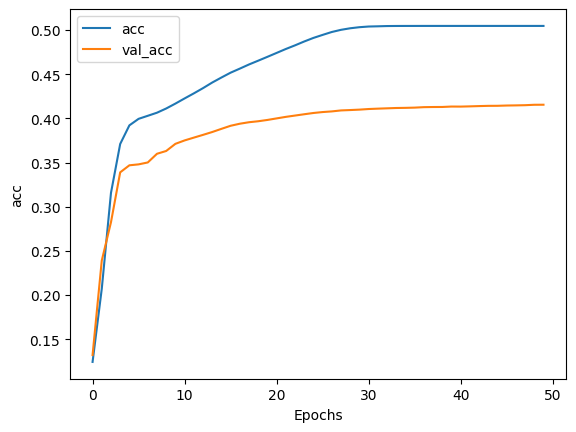

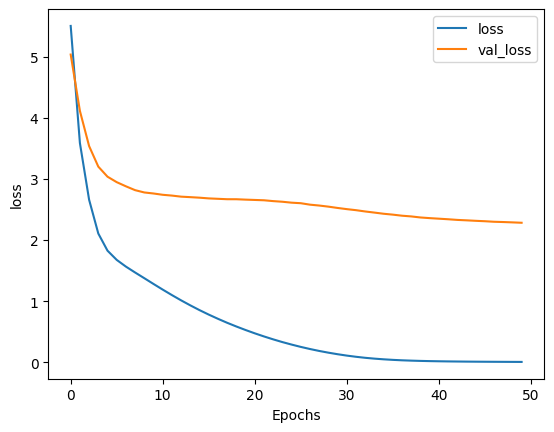

In [18]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(his, "acc")
plot_graphs(his, "loss")

In [19]:
model.save( 'D:/UTD/Spring 2024/NLP/Project 2/final_model.keras')
model.save( 'D:/UTD/Spring 2024/NLP/Project 2/final_model.h5')

In [34]:
print(tokenizer.texts_to_sequences("<sos>"), " \t\t" ,tokenizer_questions.texts_to_sequences("<sos>"))
tokenizer.word_index["sos"],100,tokenizer_questions.word_index["sos"]

[[], [34], [127], [34], []]  		 [[], [34], [127], [34], []]


(1, 100, 1)

In [41]:
# Function to generate a response given a input sentence
from tqdm import tqdm

def generate_response(input_text):
    # Tokenize the input text
    input_sequence = tokenizer_questions.texts_to_sequences([input_text])
    # Pad the input sequence
    input_sequence = pad_sequences(input_sequence, maxlen=max_len_question, padding='post')

    # Initialize the decoder input sequence with start token
    decoder_input_sequence = np.zeros((1, max_len_answer+1))
    decoder_input_sequence[0, 0] = tokenizer.word_index['sos']
    
    # Generate response using the trained model
    for i in range(max_len_answer):
        predictions = model.predict([input_sequence, decoder_input_sequence])
        predicted_id = np.argmax(predictions[0, i, :])
        if predicted_id == tokenizer.word_index['eos']:
            break
        decoder_input_sequence[0, i+1] = predicted_id

    # Convert output sequence to text
    output_text = ''
    for token_index in decoder_input_sequence[0]:
        if token_index == tokenizer.word_index['eos'] or token_index == 0:
            break
        output_text += tokenizer.index_word[token_index] + ' '

    return output_text.strip()

# Test the function with input "how are you"
input_text = "what movies are about ginger rogers?"
response = generate_response(input_text)
print("Response:", response)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Response: sos sos the the the the the the the the the the the the the the the the the the


In [ ]:
# !pip install -q datasets
from datasets import load_dataset

movie_dataset = load_dataset("wiki_movies")
movie_dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unicodedata
import pandas as pd

nltk.download('punkt')

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub("(\\W)"," ",text)
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + "<eos>"
    return text

# Apply preprocessing to question and answer columns
preprocessed_df = pd.DataFrame({
    "question":  movie_dataset["train"]["question"][:1000],
    "answer":  movie_dataset["train"]["answer"][:1000]
})
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

In [ ]:
# Preprocessing the data
questions = preprocessed_df['question'].values.tolist()
answers = preprocessed_df['answer'].values.tolist()

# Tokenizing the data
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(np.concatenate((questions, answers), axis=0))

vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
question_seqs = tokenizer.texts_to_sequences(questions)
answer_seqs = tokenizer.texts_to_sequences(answers)

# Padding sequences for equal length
# Pad sequences for equal length
max_len_question = max(len(seq) for seq in question_seqs)
max_len_answer = max(len(seq) for seq in answer_seqs)
max_len = max(max_len_question, max_len_answer)
print(max(max_len_question, max_len_answer))
# Pad sequences separately for questions and answers
question_seqs = pad_sequences(question_seqs, maxlen=max_len, padding='post')
answer_seqs = pad_sequences(answer_seqs, maxlen=max_len, padding='post')